In [24]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

In [25]:
N, F, us, dmin, sigma= sp.symbols('N F U_s d_min \Sigma{u_i}') #pensimbolan dengan sympy as sp

In [26]:
display(sigma) #display pensimbolan matematika

\Sigma{u_i}

In [27]:
cseq = N*F/us #rumus client server, server side
cseq2 = F/dmin #rumus client server, client side
p2peq1 = F/us #rumus p2p, server side
p2peq2 = F/dmin #rumus p2p, client side
p2peq3 = N*F/(us + sigma) #rumus p2p, gabungan client dan server side(P2P)
display(cseq) #display rumus
display(cseq2)
display(p2peq3)

F*N/U_s

F/d_min

F*N/(U_s + \Sigma{u_i})

In [28]:
cseq_lmbd = sp.lambdify((N,F,us),cseq)
cseq_lmdb1 = sp.lambdify((F, dmin), cseq2)
p2peq_lmdb1 = sp.lambdify((F, us), p2peq1)
p2peq_lmdb2 = sp.lambdify((F, dmin), p2peq2)
p2peq_lmdb3 = sp.lambdify((N, F, us, sigma), p2peq3)

Fq = 1
qdmin = 10
qus = 10

In [37]:
nilai_N = np.linspace(1,35,35) 
print(nilai_N)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.]


In [39]:
#CLIENT SERVER
data_n = []
data_n1= []
for n in nilai_N: #memasukan nilai n ke rumus
    data_n.append(cseq_lmbd(n,Fq,qus))
    data_n1.append(cseq_lmdb1(Fq,qdmin))
print(type(data_n)) 
print(type(data_n1))

hasilCS = np.maximum(data_n, data_n1) #mencari nilai maksimum di 2 data
print(hasilCS)

<class 'list'>
<class 'list'>
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5]


In [40]:
#HASIL P2P
data_p = []
data_p1= []
data_p2= []
for n in nilai_N:
    QSigma = n
    data_p.append(p2peq_lmdb1(Fq, qus))
    data_p1.append(p2peq_lmdb2(Fq, qdmin))
    data_p2.append(p2peq_lmdb3(n, Fq, qus, QSigma))
print(type(data_p))
print(type(data_p1))
print(type(data_p2))
hasilp2pq = np.maximum(data_p, data_p2)
hasilp2p = np.maximum(hasilp2pq, data_p1)
print(hasilp2p)

<class 'list'>
<class 'list'>
<class 'list'>
[0.1        0.16666667 0.23076923 0.28571429 0.33333333 0.375
 0.41176471 0.44444444 0.47368421 0.5        0.52380952 0.54545455
 0.56521739 0.58333333 0.6        0.61538462 0.62962963 0.64285714
 0.65517241 0.66666667 0.67741935 0.6875     0.6969697  0.70588235
 0.71428571 0.72222222 0.72972973 0.73684211 0.74358974 0.75
 0.75609756 0.76190476 0.76744186 0.77272727 0.77777778]


Text(0, 0.5, 'D')

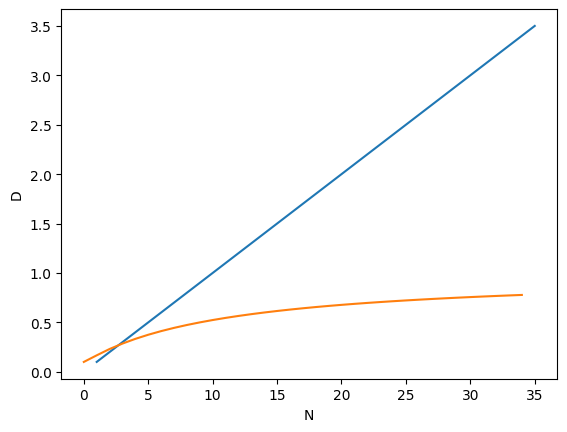

In [41]:
plt.plot(nilai_N, hasilCS, hasilp2p)
plt.xlabel('N')
plt.ylabel('D')